#Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ='/content/drive/MyDrive/diabetes.csv'

In [ ]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
sns.set_theme(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Loading data

In [ ]:
data = pd.read_csv(path)

In [ ]:
#prints first 5 columns of the table
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#shows number of rows and columns
data.shape

(768, 9)

In [ ]:
#descibes the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#gives information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#to show correlation of all columns
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
#checks if there is any missing value
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
#checks if there is any null value
data.isnull().values.any()

False

In [ ]:
#checks if there is any null value according to the rows
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [ ]:
#checks if there is any duplicate value
data.duplicated().any()

False

In [ ]:
#to remove irrelevant '0' from the dataset
no_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in no_zero:
  data[column] = data[column].replace(0,np.NaN)
  mean = int(data[column].mean(skipna=True))
  data[column] = data[column].replace(np.NaN,mean)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [ ]:
print("total number of rows : {0}".format(len(data)))
print("Rows missing in Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("Rows missing in Blood Pressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("Rows missing in Skin Thickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("Rows missing in Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("Rows missing in BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("Rows missing in Age: {0}".format(len(data.loc[data['Age'] == 0])))


total number of rows : 768
Rows missing in Glucose: 0
Rows missing in Blood Pressure: 0
Rows missing in Skin Thickness: 0
Rows missing in Insulin: 0
Rows missing in BMI: 0
Rows missing in Age: 0


In [ ]:
#shows total number of diabetic and non diabetic patients: 1-diabetic; 0-non diabetic
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


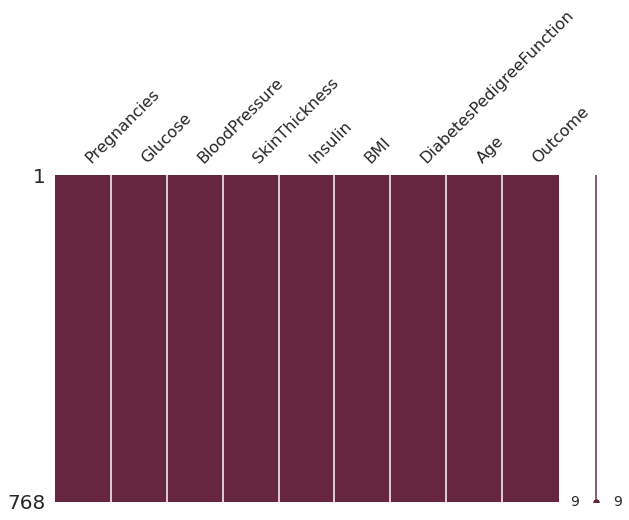

In [ ]:
print(data.isna().sum())
msno.matrix(df=data,figsize=(10,6), color=(0.40, 0.15, 0.25));

#Data Visualization


##Histogram

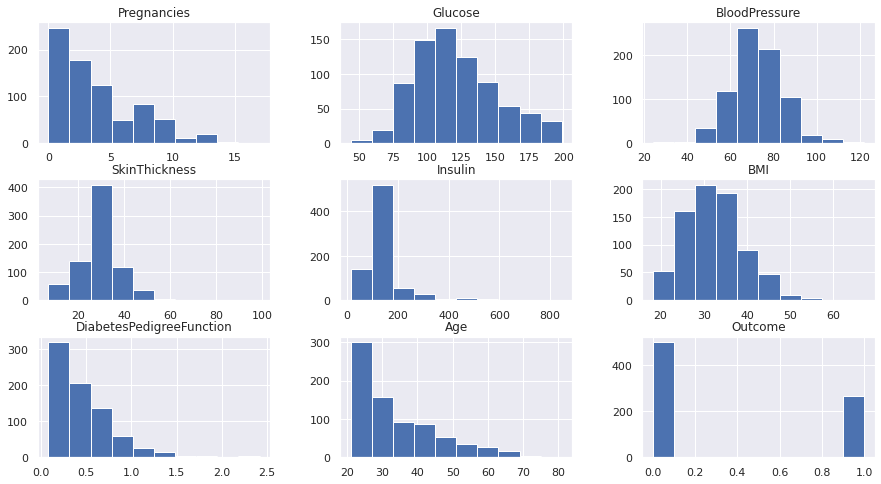

In [ ]:
data.hist(bins=10,figsize=(15,8))
plt.show;

##Countplot

Non-diabetic (0):  500
Diabetic (1) 268


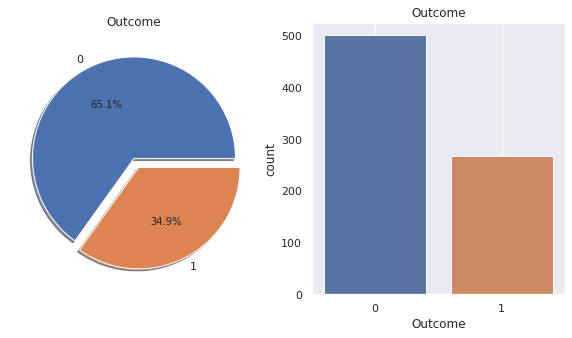

In [ ]:
#calculating total diabetic & non-diabetic people
f,ax=plt.subplots(1,2,figsize=(10,5))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data,ax=ax[1])
ax[1].set_title('Outcome')
N,D = data['Outcome'].value_counts()
print("Non-diabetic (0): ",N)
print("Diabetic (1)",D)
plt.grid()
plt.show()

##Jointplot

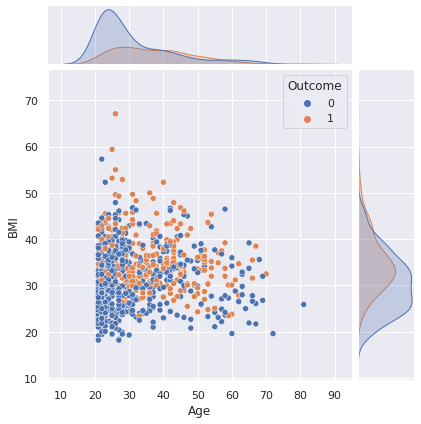

In [ ]:
sns.jointplot(x='Age', y='BMI', data=data, hue='Outcome', height=6, ratio=5, space=0.1);

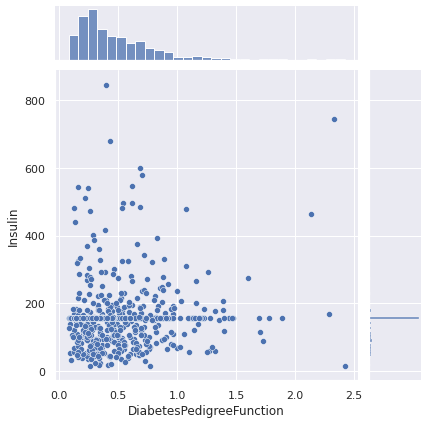

In [ ]:
sns.jointplot(x='DiabetesPedigreeFunction', y='Insulin', data=data);

##Distplot

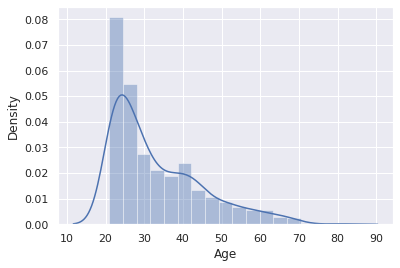

In [ ]:
sns.distplot(data['Age']);

##Histplot

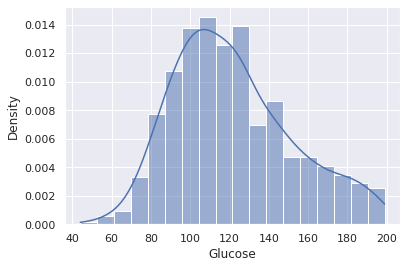

In [ ]:
sns.histplot(data["Glucose"], kde=True, stat="density");

## Pairplot

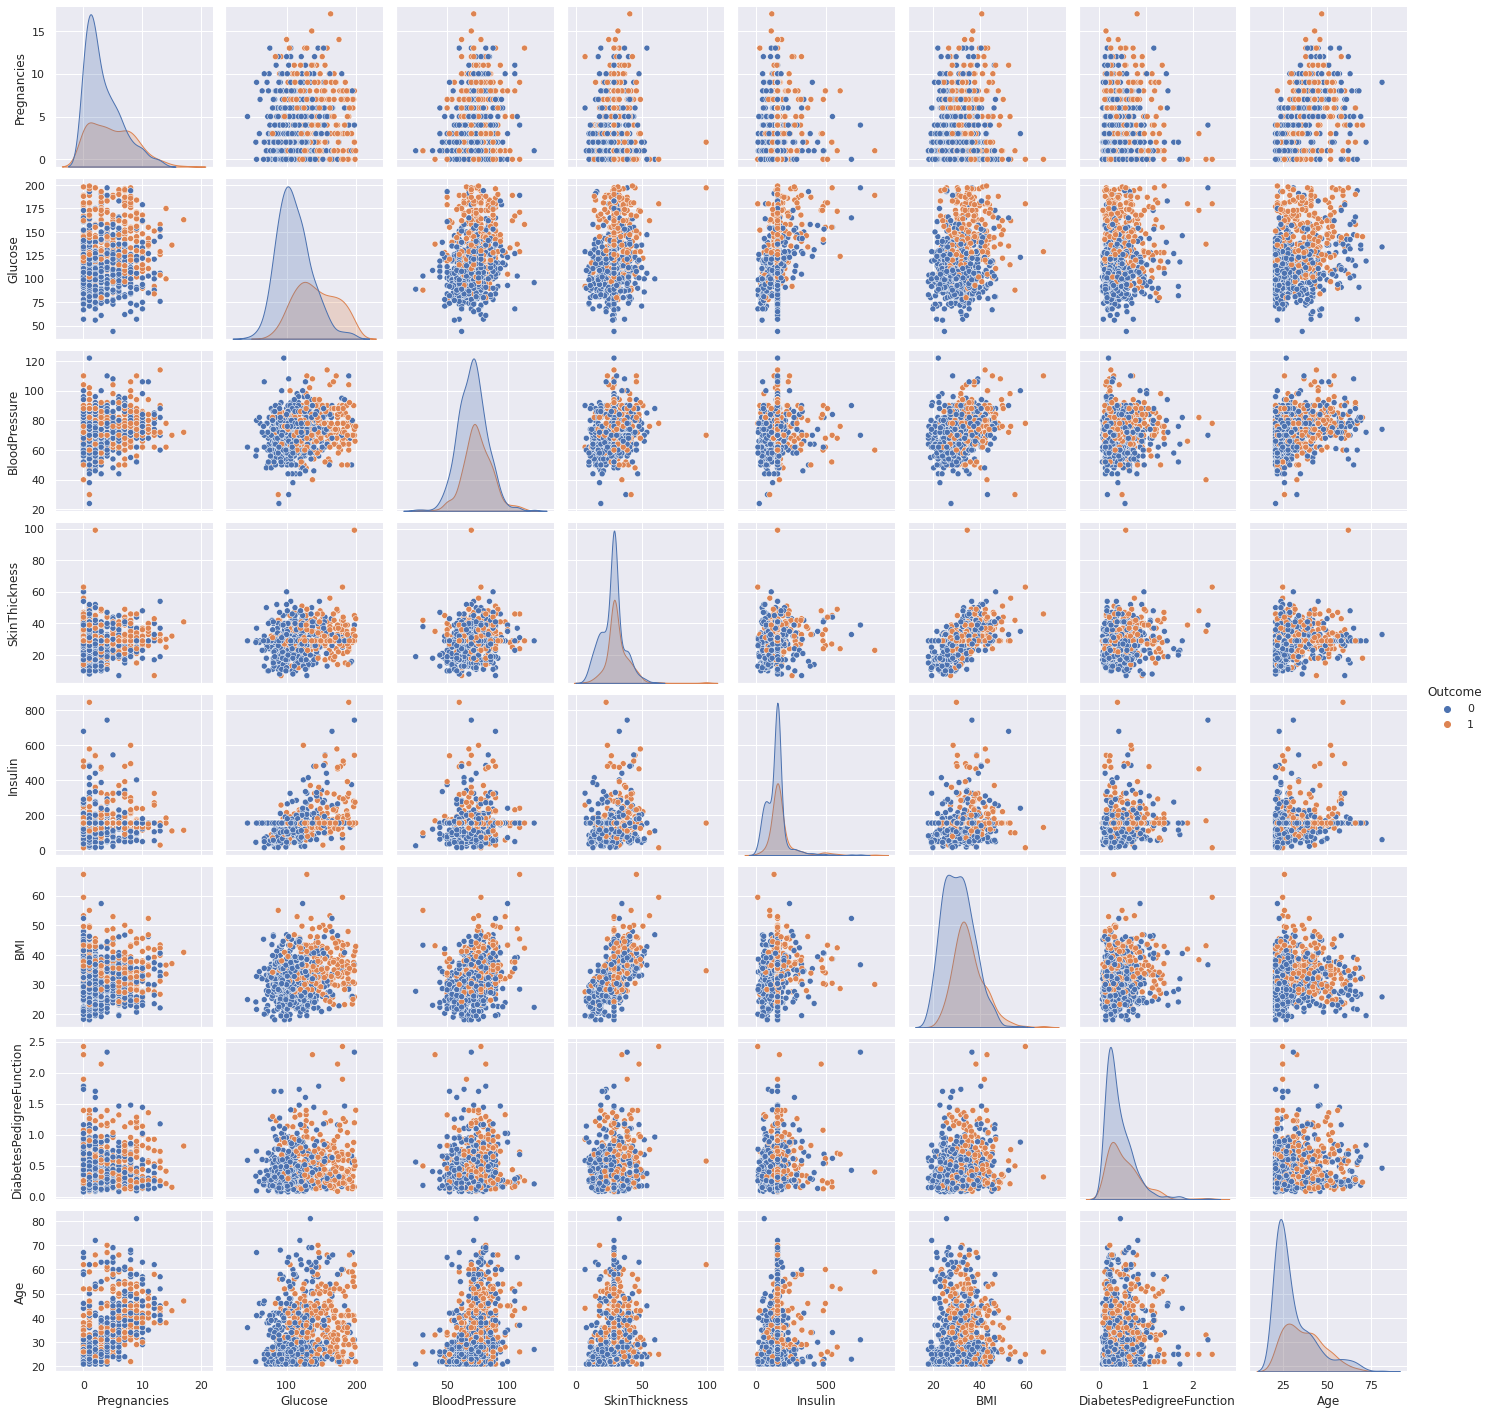

In [ ]:
sns.pairplot(data=data, hue='Outcome')
plt.show;

#Analyzing relationships between variables


##Correlation Analysis

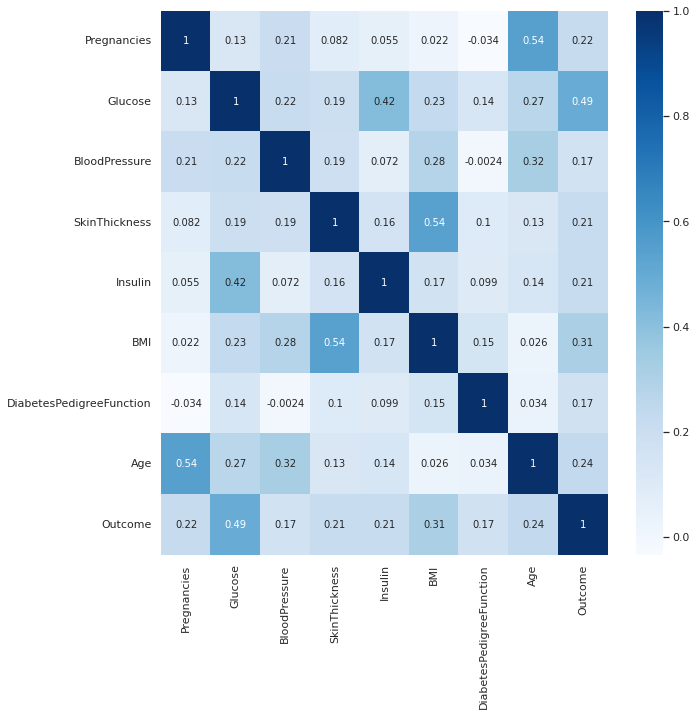

In [ ]:
cormat = data.corr()
#getting correlation of each parameter
top_corr_features = cormat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="Blues")

In [ ]:
#drops the outcome column
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

#Data Standardization

In [ ]:
#feature scaling
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
#to check if data is converted into centralized form
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.86525364 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20601255 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01595708 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02243187 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14195434 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94299462 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = data['Outcome']

In [ ]:
print(X)


[[ 0.63994726  0.86525364 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20601255 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01595708 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02243187 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14195434 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94299462 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#Train Test Split

In [ ]:
#get the locations
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, stratify=y, random_state=0)


In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
22,7,196.0,90.0,29.0,155.0,39.8,0.451,41
497,2,81.0,72.0,15.0,76.0,30.1,0.547,25
395,2,127.0,58.0,24.0,275.0,27.7,1.600,25
381,0,105.0,68.0,22.0,155.0,20.0,0.236,22
258,1,193.0,50.0,16.0,375.0,25.9,0.655,24
...,...,...,...,...,...,...,...,...
456,1,135.0,54.0,29.0,155.0,26.7,0.687,62
435,0,141.0,72.0,29.0,155.0,42.4,0.205,29
398,3,82.0,70.0,29.0,155.0,21.1,0.389,25
48,7,103.0,66.0,32.0,155.0,39.1,0.344,31


In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
680,2,56.0,56.0,28.0,45.0,24.2,0.332,22
607,1,92.0,62.0,25.0,41.0,19.5,0.482,25
639,1,100.0,74.0,12.0,46.0,19.5,0.149,28
638,7,97.0,76.0,32.0,91.0,40.9,0.871,32
295,6,151.0,62.0,31.0,120.0,35.5,0.692,28
...,...,...,...,...,...,...,...,...
526,1,97.0,64.0,19.0,82.0,18.2,0.299,21
685,2,129.0,74.0,26.0,205.0,33.2,0.591,25
391,5,166.0,76.0,29.0,155.0,45.7,0.340,27
654,1,106.0,70.0,28.0,135.0,34.2,0.142,22


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


#Building Classification Algorithms  

##Support Vector Machine Algorithm

In [ ]:
#building SVM on train data
sv=SVC()
sv.fit(X_train, y_train)

SVC()

In [ ]:
#prediction based on test data using Support Vector Machine Algorithm
sv_pred=sv.predict(X_test)

In [ ]:
#checking train data accuracy of Support Vector Machine
print("Train Accuracy: ",sv.score(X_train,y_train)*100)
print("Accuracy (Test) score of Support Vector Machine",sv.score(X_test,y_test)*100)
print("Accuracy score of Support Vector Machine",accuracy_score(y_test,sv_pred)*100)

Train Accuracy:  76.0586319218241
Accuracy (Test) score of Support Vector Machine 76.62337662337663
Accuracy score of Support Vector Machine 76.62337662337663


In [ ]:
#confusion matrix of Support Vector Machine Algorithm
cm=confusion_matrix(y_test,sv_pred)
cm

array([[89, 11],
       [25, 29]])

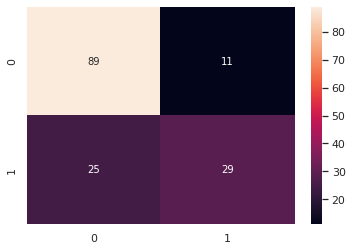

In [ ]:
sns.heatmap(confusion_matrix(y_test, sv_pred),annot=True,fmt="d");

In [ ]:
#TN-True Negative; FP-False Positive; FN-False Negative; TP-True Positive
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

TN, FP, FN, TP

(89, 11, 25, 29)

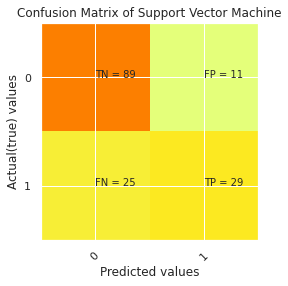

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title("Confusion Matrix of Support Vector Machine")
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

In [ ]:
pd.crosstab(y_test, sv_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,89,11,100
1,25,29,54
All,114,40,154


In [ ]:
pd.crosstab(y_test, sv_pred, margins=False)

col_0,0,1
Outcome,,
0,89,11
1,25,29


In [ ]:
#classification report of Support Vector Machine
print(classification_report(y_test, sv_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7807    0.8900    0.8318       100
           1     0.7250    0.5370    0.6170        54

    accuracy                         0.7662       154
   macro avg     0.7529    0.7135    0.7244       154
weighted avg     0.7612    0.7662    0.7565       154



In [ ]:
#prediction based on test data
prediction = sv.predict(X_test)
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
#making predictive system
input_data = (5,166,72,19,175,25.8,0.587,51)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)

prediction = sv.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


## Logistic Regression Algorithm

In [ ]:
#building Logistic Regression algorithm on train data
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
X_test.shape

(154, 8)

In [ ]:
#prediction based on test data using logistic regression algorithm
lr_pred=lr.predict(X_test)

In [ ]:
lr_pred.shape

(154,)

In [ ]:
#Train & test score of Logistic Regression
print("Train Accuracy: ",lr.score(X_train,y_train)*100)
print("Accuracy (Test) score of Logistic Regression",lr.score(X_test,y_test)*100)
print("Accuracy (Test) score of Logistic Regression",accuracy_score(y_test,lr_pred)*100)

Train Accuracy:  76.71009771986971
Accuracy (Test) score of Logistic Regression 77.92207792207793
Accuracy (Test) score of Logistic Regression 77.92207792207793


In [ ]:
#confusion matrix of logistic regression
cm=confusion_matrix(y_test,lr_pred)
cm

array([[89, 11],
       [23, 31]])

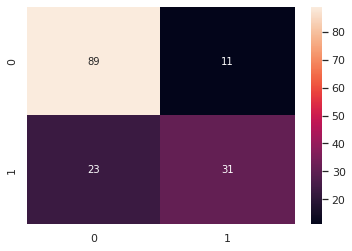

In [ ]:
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt="d");

In [ ]:
#TN-True Negative; FP-False Positive; FN-False Negative; TP-True Positive
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

TN, FP, FN, TP

(89, 11, 23, 31)

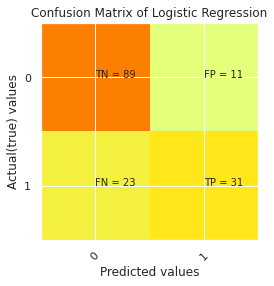

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title("Confusion Matrix of Logistic Regression")
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

In [ ]:
pd.crosstab(y_test, lr_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,89,11,100
1,23,31,54
All,112,42,154


In [ ]:
pd.crosstab(y_test, lr_pred, margins=False)

col_0,0,1
Outcome,,
0,89,11
1,23,31


In [ ]:
#classification report of logistic regression
print(classification_report(y_test, lr_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7946    0.8900    0.8396       100
           1     0.7381    0.5741    0.6458        54

    accuracy                         0.7792       154
   macro avg     0.7664    0.7320    0.7427       154
weighted avg     0.7748    0.7792    0.7717       154



In [ ]:
#prediction based on test data
prediction = lr.predict(X_test)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
#making predictive system
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)

prediction = lr.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


##Random Forest Algorithm

In [ ]:
#building random forest algortihm on train data
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
#prediction based on test data using random forest algortihm
rf_pred=rf.predict(X_test)

In [ ]:
#Train & test score of Random Forest algorithm
print("Train Accuracy: ",rf.score(X_train,y_train)*100)
print("Accuracy (Test) score of Random Forest",rf.score(X_test,y_test)*100)
print("Accuracy score of Random Forest",accuracy_score(y_test,rf_pred)*100)

Train Accuracy:  100.0
Accuracy (Test) score of Random Forest 75.97402597402598
Accuracy score of Random Forest 75.97402597402598


In [ ]:
#confusion matrix of random forest algorithm
cm=confusion_matrix(y_test,rf_pred)
cm

array([[87, 13],
       [24, 30]])

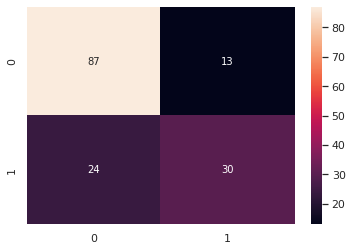

In [ ]:
sns.heatmap(confusion_matrix(y_test, rf_pred),annot=True,fmt="d");

In [ ]:
#TN-True Negative; FP-False Positive; FN-False Negative; TP-True Positive
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

TN, FP, FN, TP

(87, 13, 24, 30)

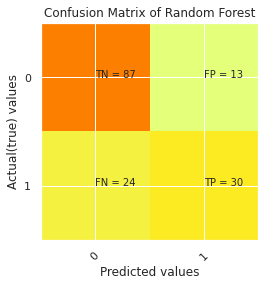

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title("Confusion Matrix of Random Forest")
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

In [ ]:
pd.crosstab(y_test, rf_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,87,13,100
1,24,30,54
All,111,43,154


In [ ]:
pd.crosstab(y_test, rf_pred, margins=False)

col_0,0,1
Outcome,,
0,87,13
1,24,30


In [ ]:
#classification report of random forest algorithm
print(classification_report(y_test, rf_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7838    0.8700    0.8246       100
           1     0.6977    0.5556    0.6186        54

    accuracy                         0.7597       154
   macro avg     0.7407    0.7128    0.7216       154
weighted avg     0.7536    0.7597    0.7524       154



In [ ]:
#prediction based on test data
prediction = rf.predict(X_test)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
#making predictive system
input_data = (5,166,72,19,175,25.8,0.587,51)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)

prediction = rf.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


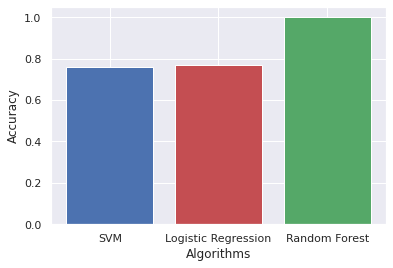

In [ ]:
#comparing the accuracy score of all algorithms
plt.bar(x=['SVM','Logistic Regression','Random Forest'], height=[sv.score(X_train,y_train), lr.score(X_train,y_train), rf.score(X_train,y_train)], color='brg')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()